## 1. Descriptive Statistics

In [1]:
# Library pengolahan data
import pandas as pd
import numpy as np

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# load distribution
from scipy.stats import binom
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import ttest_ind
import math
from statsmodels.stats.proportion import proportions_ztest

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data & cek

data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# data shape

data.shape

(1338, 7)

In [4]:
# statistics describtive setiap kolom

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# rata-rata umur perokok berdasarkan gender

data.groupby(['sex', 'smoker']).agg({'age':['mean']}).round()

age
               mean
sex    smoker      
female no      40.0
       yes     39.0
male   no      39.0
       yes     38.0

In [6]:
# rata-rata charges perokok

data.groupby(['smoker']).agg({'charges':['mean']}).round()

,charges
,mean
smoker,
no,8434.0
yes,32050.0


In [7]:
# variansi tagihan perokok dan non-perokok

data[data['smoker']== 'yes']['charges'].var()
data.groupby(['smoker']).var()

,age,bmi,children,charges
smoker,,,,
no,198.342438,36.519195,1.483855,3.592542e+07
yes,193.855097,39.925262,1.338801,1.332073e+08


In [8]:
# rata-rata BMI dari perokok dan non-perokok

data.groupby(['smoker','sex']).agg({'bmi':['mean']}).round(1)

bmi
               mean
smoker sex         
no     female  30.5
       male    30.8
yes    female  29.6
       male    31.5

In [9]:
# rata-rata BMI dari perokok

data.groupby(['smoker']).agg({'bmi':['mean']}).round(1)

,bmi
,mean
smoker,
no,30.7
yes,30.7


In [10]:
# membuat kolom baru, BMI category

bmi_condition = [data['bmi'] < 18.5, data['bmi'] < 25, data['bmi'] < 30, data['bmi'] >= 30]
category = ["underweight", "healthy", "overweight", "obese"]

data['kategori'] = np.select(bmi_condition, category)
data.head()

,age,sex,bmi,children,smoker,region,charges,kategori
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [11]:
# rata-rata tagihan

data.groupby(['smoker']).agg({'charges':['mean']}).round(0)

,charges
,mean
smoker,
no,8434.0
yes,32050.0


In [12]:
# rata-rata tagihan perokok yang obesitas
data[data.kategori =='obese'].groupby(['smoker','kategori']).agg({'charges':['mean']}).round(2)

,,charges
,,mean
smoker,kategori,
no,obese,8842.69
yes,obese,41557.99


In [13]:
data.groupby(['smoker','kategori']).agg({'charges':['mean']}).round(2)

charges
                        mean
smoker kategori             
no     healthy       7685.66
       obese         8842.69
       overweight    8257.96
       underweight   5532.99
yes    healthy      19942.22
       obese        41557.99
       overweight   22495.87
       underweight  18809.82

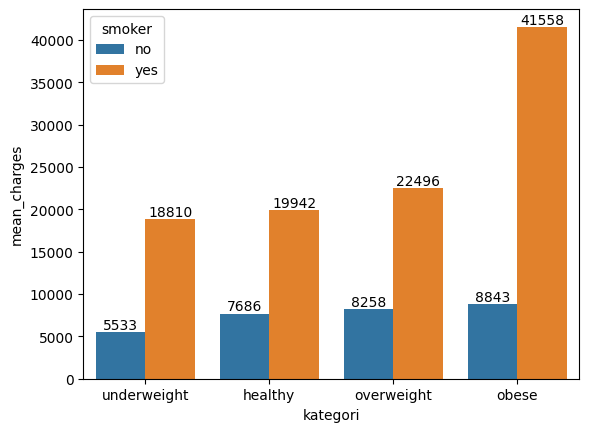

In [14]:
# visualisasi proporsi charges vs kategori

cat = data.groupby(['smoker', 'kategori']).agg(mean_charges=("charges", 'mean')).round()
cat = cat.reset_index()

order = ['underweight', 'healthy', 'overweight', 'obese']


ax = sns.barplot(x="kategori",
           y="mean_charges",
           hue="smoker",
           order = order,
           data=cat)
for i in ax.containers:
    ax.bar_label(i,)

## 2. Analisa Variabel Diskrit

In [15]:
# distribusi peluang banyak data dari tiap region

region_total = data['region'].count()
region = data.groupby(['region']).agg({'region':'count'})

region['percentage'] = 100 * region['region'] / region_total #persentase
region = region.round()


region

,region,percentage
region,,
northeast,324,24.0
northwest,325,24.0
southeast,364,27.0
southwest,325,24.0


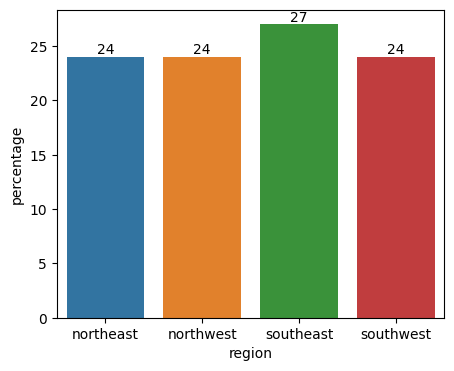

In [16]:
# visualisasi proprosi data tiap region

plt.figure(figsize=(5,4))
ax = sns.barplot(x=region.index,
           y="percentage",
           data=region)
for i in ax.containers:
    ax.bar_label(i,)

In [17]:
# rata-rata tagihan laki laki dan perempuan

data.groupby(['sex']).agg({'charges':['mean']}).round()

,charges
,mean
sex,
female,12570.0
male,13957.0


In [18]:
# Persentase tagihan pria dibandingkan wanita
selisih = 13957-12570

persen = selisih/12570 * 100
print(f'Rata-rata tagihan laki-laki lebih mahal {persen:.1f}% dari perempuan')

Rata-rata tagihan laki-laki lebih mahal 11.0% dari perempuan


In [19]:
# Proporsi perokok dan non-perokok

smoker = data.groupby(['smoker']).agg({'smoker':['count']}).round(1)
smoker['percentage'] = 100 * smoker['smoker'] / 1338
smoker = smoker.round(1)

smoker

,smoker,percentage
,count,
smoker,,
no,1064,79.5
yes,274,20.5


[Text(0, 0, '1064'), Text(0, 0, '274')]

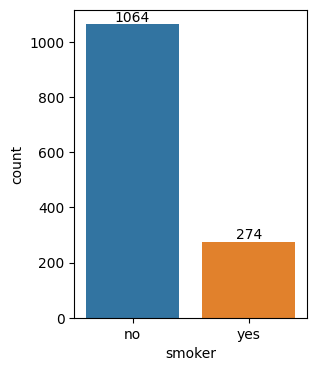

In [20]:
# visualisasi proporsi perokok

plt.figure(figsize=(3,4))
ax = sns.countplot(x = 'smoker', data = data, order=data['smoker'].value_counts().index)

smoke_values = data['smoker'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=smoke_values)

In [21]:
# proporsi perokok dan non-perokok berdasarkan region

smoker_region = data.groupby(['region','smoker']).agg(smoker_count=('smoker', 'size')
        )

smoker_region['percentage'] = smoker_region.groupby('region')['smoker_count'].transform(lambda x: x/x.sum()*100)

smoker_region.round(1)

smoker_count  percentage
region    smoker                          
northeast no               257        79.3
          yes               67        20.7
northwest no               267        82.2
          yes               58        17.8
southeast no               273        75.0
          yes               91        25.0
southwest no               267        82.2
          yes               58        17.8

<Figure size 300x400 with 0 Axes>

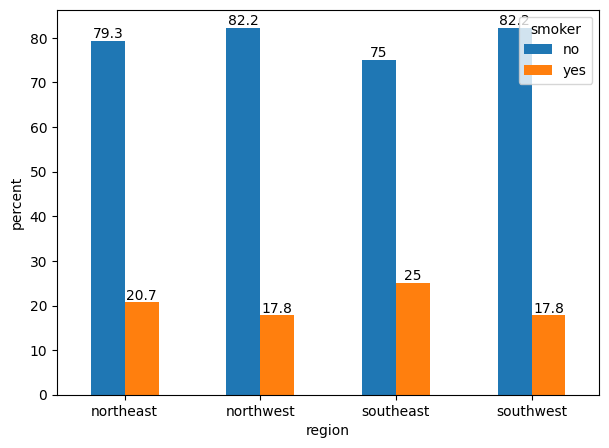

In [22]:
# visualisasi perokok dan non-perokok berdasarkan region

plt.figure(figsize=(3,4))
df_pivot = smoker_region.pivot_table(
                          values="percentage",
                          index="region",
                          columns="smoker",
                          aggfunc=np.mean).round(1)

ax = df_pivot.plot(kind='bar', figsize=(7,5), rot = 0)
plt.ylabel("percent")
for i in ax.containers:
    ax.bar_label(i,)

In [23]:
# menghitung jumlah perokok dan non-perokok berdasarkan gender

data.groupby(['sex','smoker']).agg({'smoker':['count']}).round(2)

smoker
               count
sex    smoker       
female no        547
       yes       115
male   no        517
       yes       159

In [24]:
# peluang pria atau wanita, diketahui dia perokok

smoker_total = 159+115

female = 547+115
female_smoker = 115

male = 517+159
male_smoker = 159

f_given_smoke = female_smoker / smoker_total
m_given_smoke = male_smoker / smoker_total

print(f'Peluang seseorang tersebut Perempuan, diketahui dia perokok: {f_given_smoke:,.2f}')
print(f'Peluang seseorang tersebut Laki-laki, diketahui dia perokok: {m_given_smoke:,.2f}')

Peluang seseorang tersebut Perempuan, diketahui dia perokok: 0.42
Peluang seseorang tersebut Laki-laki, diketahui dia perokok: 0.58


In [25]:
# Proporsi perokok laki-laki dan perempuan

smoker_gender = data[data.smoker=='yes'].groupby(['sex'])['smoker'].agg('count').round(1)
smoker_gender = smoker_gender.to_frame()
smoker_gender['percentage'] = 100 * smoker_gender['smoker'] / 274
smoker_gender = smoker_gender.round(1)

smoker_gender


,smoker,percentage
sex,,
female,115,42.0
male,159,58.0


## 3. Analisa Continuous Variable

1. Peluang BMI > 25 dibandingkan dengan peluang BMI < 25, dalam mendapatkan tagihan kesehatan > 16.700

In [26]:
# filter jumlah BMI > 25 dan punya tagihan > 16.700

condition_1 = data[(data['bmi']>25) & (data['charges']> 16700)]
condition_1.head()

,age,sex,bmi,children,smoker,region,charges,kategori
0,19,female,27.90,0,yes,southwest,16884.92400,overweight
9,60,female,25.84,0,no,northwest,28923.13692,overweight
11,62,female,26.29,0,yes,southeast,27808.72510,overweight
14,27,male,42.13,0,yes,southeast,39611.75770,obese
19,30,male,35.30,0,yes,southwest,36837.46700,obese


In [27]:
p_irisan_1 = 283
p_bmi_over_25 = len(data[data['bmi']>25])

# peluang tagihan seseorang > 16.700 diketahui BMI > 25

p_over16_given_over25 = p_irisan_1 / p_bmi_over_25 *100
print(f'Peluang mendapatkan tagihan > 16.700 diketahui BMI > 25: {p_over16_given_over25:.2f}%')

Peluang mendapatkan tagihan > 16.700 diketahui BMI > 25: 25.94%


In [28]:
# filter jumlah BMI < 25 dan punya tagihan > 16.700

condition_2 = data[(data['bmi']<25) & (data['charges']>16700)]
condition_2.head()

,age,sex,bmi,children,smoker,region,charges,kategori
3,33,male,22.705,0,no,northwest,21984.47061,healthy
58,53,female,22.880,1,yes,southeast,23244.79020,healthy
62,64,male,24.700,1,no,northwest,30166.61817,healthy
69,28,male,23.980,3,yes,southeast,17663.14420,healthy
85,45,male,22.895,2,yes,northwest,21098.55405,healthy


In [29]:
p_irisan_2 = len(data[(data['bmi']<25) & (data['charges']>16700)])
p_bmi_under_25 = len(data[data['bmi']<25])

# peluang tagihan seseorang > 16.700 diketahui BMI < 25

p_over16_under25 = p_irisan_2 / p_bmi_under_25 *100
print(f'Peluang mendapatkan tagihan > 16.700 diketahui BMI < 25: {p_over16_under25:.2f}%')

Peluang mendapatkan tagihan > 16.700 diketahui BMI < 25: 20.82%


2. Peluang perokok dengan BMI > 25 dibandingkan dengan non-perokok dengan BMI > 25, dalam mendapatkan tagihan kesehatan > 16.700

In [30]:
# filter perokok dengan BMI > 25 dan punya tagihan > 16.700

condition_3 = data[(data['bmi']>25) & (data['charges']> 16700) & (data['smoker']=='yes')]
condition_3.head()

,age,sex,bmi,children,smoker,region,charges,kategori
0,19,female,27.90,0,yes,southwest,16884.9240,overweight
11,62,female,26.29,0,yes,southeast,27808.7251,overweight
14,27,male,42.13,0,yes,southeast,39611.7577,obese
19,30,male,35.30,0,yes,southwest,36837.4670,obese
23,34,female,31.92,1,yes,northeast,37701.8768,obese


In [31]:
# filter perokok dengan BMI > 25

condition_4 = data[(data['bmi']>25) & (data['smoker']=='yes')]
condition_4.head()


,age,sex,bmi,children,smoker,region,charges,kategori
0,19,female,27.90,0,yes,southwest,16884.9240,overweight
11,62,female,26.29,0,yes,southeast,27808.7251,overweight
14,27,male,42.13,0,yes,southeast,39611.7577,obese
19,30,male,35.30,0,yes,southwest,36837.4670,obese
23,34,female,31.92,1,yes,northeast,37701.8768,obese


In [32]:
p_smoker_over25_over16 = 215
p_smoker_over25 = 219

# peluang tagihan seseorang > 16.700, diketahui BMI < 25 dan perokok

p_over16_given_over25_smoker = p_smoker_over25_over16 / p_smoker_over25 *100
print(f'Peluang mendapatkan tagihan > 16.700, diketahui BMI > 25 dan juga perokok: {p_over16_given_over25_smoker:.2f}%')

Peluang mendapatkan tagihan > 16.700, diketahui BMI > 25 dan juga perokok: 98.17%


In [33]:
# filter non-perokok dengan BMI > 25 dan punya tagihan > 16.7k

condition_5 = data[(data['bmi']>25) & (data['charges']> 16700) & (data['smoker']=='no')]
condition_5.head()

,age,sex,bmi,children,smoker,region,charges,kategori
9,60,female,25.840,0,no,northwest,28923.13692,overweight
45,55,male,37.300,0,no,southwest,20630.28351,obese
102,18,female,30.115,0,no,northeast,21344.84670,obese
115,60,male,28.595,0,no,northeast,30259.99556,overweight
138,54,female,31.900,3,no,southeast,27322.73386,obese


In [34]:
# filter non-perokok dengan BMI > 25

condition_6 = data[(data['bmi']>25) & (data['smoker']=='no')]
condition_6.head()

,age,sex,bmi,children,smoker,region,charges,kategori
1,18,male,33.77,1,no,southeast,1725.5523,obese
2,28,male,33.00,3,no,southeast,4449.4620,obese
4,32,male,28.88,0,no,northwest,3866.8552,overweight
5,31,female,25.74,0,no,southeast,3756.6216,overweight
6,46,female,33.44,1,no,southeast,8240.5896,obese


In [35]:
p_nonSmoker_over25_over16 = 68
p_nonSmoker_over25 = 872

# peluang tagihan seseorang > 16.700, diketahui BMI < 25 dan non-perokok

p_over16_given_over25_nonSmoker = p_nonSmoker_over25_over16 / p_nonSmoker_over25 *100
print(f'Peluang mendapatkan tagihan > 16.700, diketahui BMI > 25 dan juga non-perokok: {p_over16_given_over25_nonSmoker:.2f}%')

Peluang mendapatkan tagihan > 16.700, diketahui BMI > 25 dan juga non-perokok: 7.80%


## 4. Korelasi Variabel

1. Korelasi BMI dengan tanggungan anak

In [36]:
# Kovarians bmi dengan tanggungan anak

np.cov(data['bmi'], data['children'])

array([[37.18788361,  0.09379476],
       [ 0.09379476,  1.45321275]])

In [37]:
# Korelasi bmi dengan tanggungan anak

data[['bmi', 'children']].corr()

,bmi,children
bmi,1.000000,0.012759
children,0.012759,1.000000


2. Korelasi BMI dengan tagihan

In [38]:
# Kovarians bmi dengan tagihan

np.cov(data['bmi'], data['charges'])

array([[3.71878836e+01, 1.46473044e+04],
       [1.46473044e+04, 1.46652372e+08]])

In [39]:
# Korelasi bmi dengan tagihan

data[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


3. Tabel korelasi semua variabel numerik

In [40]:
# Semua korelasi antar variabel

all_correlation = data.corr(method="pearson")
all_correlation.round(2)

,age,bmi,children,charges
age,1.00,0.11,0.04,0.30
bmi,0.11,1.00,0.01,0.20
children,0.04,0.01,1.00,0.07
charges,0.30,0.20,0.07,1.00


<Axes: xlabel='bmi', ylabel='charges'>

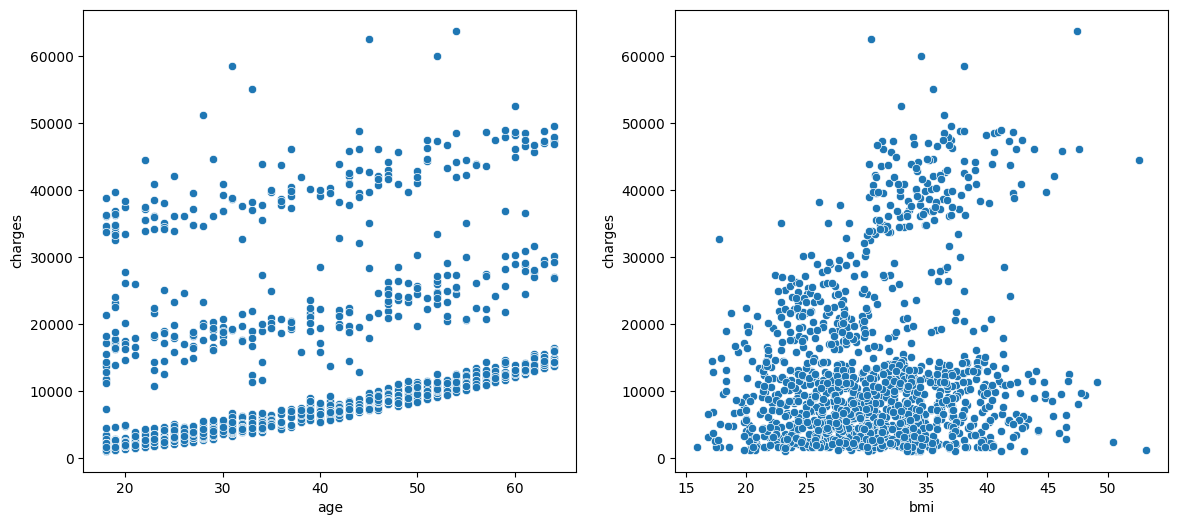

In [41]:
# Visualisasi korelasi [usia/bmi] dengan tagihan

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))

sns.scatterplot(data=data, x="age", y="charges",ax = ax[0])

sns.scatterplot(data=data, x="bmi", y="charges",ax = ax[1])

<Axes: xlabel='children', ylabel='charges'>

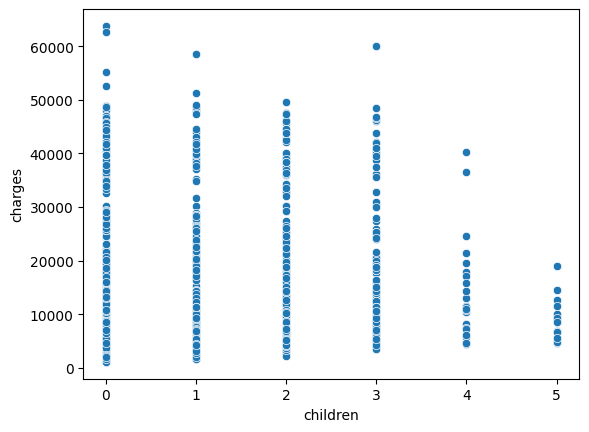

In [42]:
# Visualisasi korelasi children dengan tagihan

sns.scatterplot(data=data, x="children", y="charges")

## 5. Uji Hipotesis

### Hypothesis Testing 1 - Variansi tagihan perokok sama dengan tagihan non-perokok.

H(0): Tagihan perokok = tagihan non-perokok
<br>
H(1): Tagihan perokok =/= tagihan non-perokok
<br>
tingkat signifikansi: 0.05

1. Uji Statistik

In [43]:
alpha = 0.05

In [44]:
# cek variansi perokok dan non-perokok

check_var = pd.DataFrame(data.groupby(['smoker']).agg({'charges':['mean','var','std','count']}).round())
check_var

charges                            
           mean          var      std count
smoker                                     
no       8434.0   35925420.0   5994.0  1064
yes     32050.0  133207311.0  11542.0   274

In [45]:
# grup 1 = smoker
# grup 2 = non smoker

rataan1 = 32050
rataan2 = 8434

# Menentukan sample variance

s_x = 133207311
s_y = 35925420

# Ukuran sampel dua kelompok

sample1 = 274
sample2 = 1064

#derajat kebebasan

df1 = 274 -1
df2 = 1064 - 1

In [46]:
# Hitung uji statistik
# s_x menjadi pembilang karena lebih besar
# Nilai Critical Value berdasarkan critical f-value dari f-table dengan nilai alpha 0.05

f_test=round(s_x/s_y, 2)
f_crit=round(stats.f.ppf(1-0.05, df1, df2), 2)

print("Hasil uji statistik adalah (f-test):", f_test,"dan nilai f_crit:", f_crit)

Hasil uji statistik adalah (f-test): 3.71 dan nilai f_crit: 1.17


2. Aturan Keputusan

Uji pihak kanan, tolak H(0) jika Uji Statistik > Nilai Kritis atau P-value < 0.05

In [47]:
# Menentukan aturan keputusan

if f_test>f_crit:
  print(f"Tolak null hypothesis di taraf signifikansi 5% karena F > {f_crit} (F={f_test})")
  print('Varians tagihan perokok tidak sama dengan non-perokok')
else:
  print(f"Gagal tolak null hypothesis di taraf signifikansi 5% karena F < {f_crit} (F={f_test})")
  print('Variansi tagihan perokok sama dengan non-perokok')

Tolak null hypothesis di taraf signifikansi 5% karena F > 1.17 (F=3.71)
Varians tagihan perokok tidak sama dengan non-perokok


### Hypothesis Testing 2 - Proporsi perokok laki-laki lebih besar daripada perempuan.

H(0): Proporsi perokok laki-laki = perokok perempuan
<br>
H(1): Proporsi perokok laki-laki > perokok perempuan
<br>
tingkat signifikansi: 0.05

1. Uji Statistik

In [48]:
# Proporsi perokok laki-laki dan perempuan

smoker_gender = data[data.smoker=='yes'].groupby(['sex'])['smoker'].agg('count').round(1)
smoker_gender = smoker_gender.to_frame()
smoker_gender['percentage'] = 100 * smoker_gender['smoker'] / 274
smoker_gender = smoker_gender.round(1)

smoker_gender

,smoker,percentage
sex,,
female,115,42.0
male,159,58.0


In [49]:
# Menentukan jumlah kejadian ukuran sampel (n), proporsi pada null hypothesis, dan proporsi sample

n = 274
p = 0.50
p_hat = 159/274

In [50]:
# Hitung uji statistik
# Nilai Critical Value berdasarkan critical Z-value dari Z-table dengan nilai alpha 0.05

test_stat=(p_hat-p)/(math.sqrt((p*(1-p))/(n)))
z_crit=stats.norm.ppf(1-0.05)  # right-tailed test

# Interpretasi hasil

print("Dari program di atas hasil uji statistik adalah : ", test_stat)
print("Dengan nilai uji statistik", test_stat,"dan nilai z_crit", stats.norm.ppf(1-0.05) )

Dari program di atas hasil uji statistik adalah :  2.658137210652779
Dengan nilai uji statistik 2.658137210652779 dan nilai z_crit 1.6448536269514722


2. Aturan Keputusan

Uji pihak kanan, tolak H(0) jika Uji Statistik > Nilai Kritis atau P-value < 0.05

In [52]:
# Menentukan aturan keputusan

if test_stat>z_crit:
    print(f"Tolak null hypothesis di taraf signifikansi 5% karena Z > {z_crit:.2f} (Z = {test_stat:.2f})")
    print('Proporsi perokok laki-laki lebih besar dari proporsi perokok perempuan')
else:
    print("Gagal tolak null hypothesis di taraf signifikansi 5% karena Z < {z_crit:.2f} (Z = {test_stat:.2f})")
    print("Proporsi perokok laki-laki sama dengan proporsi perokok perempuan")

Tolak null hypothesis di taraf signifikansi 5% karena Z > 1.64 (Z = 2.66)
Proporsi perokok laki-laki lebih besar dari proporsi perokok perempuan


### Hypothesis Testing 3 - Tagihan perokok lebih besar dari non-perokok.

H(0): Tagihan perokok = non-perokok
<br>
H(1): Tagihan perokok > non-perokok
<br>
tingkat signifikansi: 0.05

In [53]:
# cek variansi perokok dan non-perokok

check_var = pd.DataFrame(data.groupby(['smoker']).agg({'charges':['mean','var','std','count']}).round())
check_var

charges                            
           mean          var      std count
smoker                                     
no       8434.0   35925420.0   5994.0  1064
yes     32050.0  133207311.0  11542.0   274

1. Uji Statistik

In [54]:
smoker_array = np.array(data[data.smoker =='yes'].charges)
non_smoker_array = np.array(data[data.smoker =='no'].charges)

In [55]:
stat, p = ttest_ind(a = smoker_array, b = non_smoker_array, equal_var=False, alternative='greater')

# equal_var = False karena varians kedua populasi berbeda

# Interpretasi Hasil

print(p)
print('Statistics = %.4f, p-value = %.4f' % (stat, p))

2.94473222335849e-103
Statistics = 32.7519, p-value = 0.0000


3. Aturan Keputusan

Uji pihak kanan, tolak H(0) jika Uji Statistik > Nilai Kritis atau P-value < 0.05

In [56]:
# Pengambilan Keputusan

if p > alpha:
    print(f'Gagal tolak null hypothesis di taraf signifikansi 5% karena P-value > {alpha} (P = {p:.2f})')
    print('Tagihan perokok sama dengan non-perokok')
else:
    print(f'Tolak null hypothesis di taraf signifikansi 5% karena P-value < {alpha} (P = {p:.2f})')
    print('Tagihan perokok lebih besar dari perokok')

Tolak null hypothesis di taraf signifikansi 5% karena P-value < 0.05 (P = 0.00)
Tagihan perokok lebih besar dari perokok
